In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  int64  
 1   age                  15000 non-null  float64
 2   height(cm)           15000 non-null  float64
 3   weight(kg)           15000 non-null  float64
 4   waist(cm)            15000 non-null  float64
 5   eyesight(left)       15000 non-null  float64
 6   eyesight(right)      15000 non-null  float64
 7   hearing(left)        15000 non-null  float64
 8   hearing(right)       15000 non-null  float64
 9   systolic             15000 non-null  float64
 10  relaxation           15000 non-null  float64
 11  fasting blood sugar  15000 non-null  float64
 12  Cholesterol          15000 non-null  float64
 13  triglyceride         15000 non-null  float64
 14  HDL                  15000 non-null  float64
 15  LDL                  15000 non-null 

In [11]:
df_train.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,...,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,...,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,...,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,...,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,...,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0


In [12]:
X = df_train.drop(columns='smoking')
y = df_train['smoking']

# Split data into train and test for demonstration purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
model = RandomForestClassifier(
        n_estimators=235,
        max_depth=9,
        min_samples_split=4,
        min_samples_leaf=1,
        max_features='sqrt',
        bootstrap=False,
        random_state=42,
        n_jobs=-1
    )

roc_auc_train = cross_val_score(model, X_train, y_train, cv=3, scoring="roc_auc", n_jobs=-1).mean()
roc_auc_test = cross_val_score(model, X_test, y_test, cv=3, scoring="roc_auc", n_jobs=-1).mean()
print(roc_auc_train)
print(roc_auc_test)


0.8805435670645071
0.8727107722286722


ROC AUC Score: 0.88


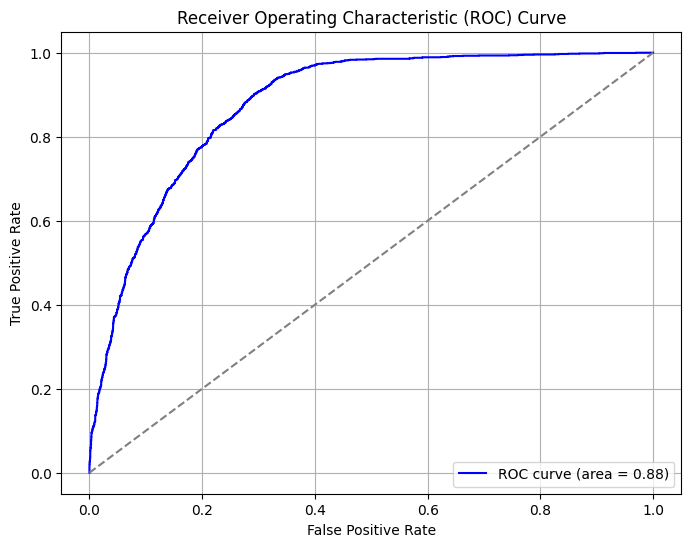

In [16]:
# Get the predicted probabilities for the positive class (class 1)
model.fit(X_train,y_train)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [20]:
df_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,15000,40.0,175.0,70.0,84.0,1.5,1.5,1.0,1.0,120.0,...,122.0,45.0,109.0,16.0,1.0,1.0,15.0,9.0,25.0,0.0
1,15001,45.0,155.0,55.0,72.4,0.6,0.5,1.0,1.0,102.0,...,104.0,56.0,109.0,11.5,1.0,0.8,14.0,10.0,13.0,0.0
2,15002,40.0,160.0,55.0,76.0,1.2,1.2,1.0,1.0,115.0,...,84.0,77.0,74.0,13.3,1.0,0.8,14.0,10.0,11.0,0.0
3,15003,45.0,150.0,50.0,74.4,1.0,1.0,1.0,1.0,96.0,...,63.0,85.0,82.0,13.4,1.0,0.7,23.0,15.0,18.0,0.0
4,15004,35.0,185.0,80.0,90.0,0.8,1.0,1.0,1.0,113.0,...,89.0,59.0,105.0,15.6,1.0,0.9,16.0,26.0,20.0,0.0


In [27]:
# Get the predicted probabilities for the positive class (class 1)
model.fit(X_train,y_train)
y_prob = model.predict_proba(df_test)[:, 1]


In [29]:
submission.head()

,id,smoking
0,15000,0.732758
1,15001,0.024145
2,15002,0.029825
3,15003,0.033316
4,15004,0.419005


In [28]:
submission['smoking'] = y_prob

submission.to_csv('my_submission.csv',index=False)

submission

,id,smoking
0,15000,0.732758
1,15001,0.024145
2,15002,0.029825
3,15003,0.033316
4,15004,0.419005
...,...,...
9995,24995,0.394678
9996,24996,0.726470
9997,24997,0.314527
9998,24998,0.021042
